### Student Information
Name: 許詠晴

Student ID: 111062575

GitHub ID: Hsu0623

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

## First: do the take home exercises in the DM2022-Lab1-Master.
### github Link: 
https://github.com/Hsu0623/DM2022-Lab1-Master

## Second: follow the same process from the DM2022-Lab1-Master on the new dataset.

## 1. The Data

This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015
Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment, extracted from reviews of products, movies, and restaurants

Format:

sentence \t score \n


Details:

Score is either 1 (for positive) or 0 (for negative)	


The sentences come from three different websites/fields:

imdb.com

amazon.com

yelp.com

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews. 
We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

## 2. Data Preparation +   3. Data Transformation

In [2]:
# importing 
import pandas as pd
import numpy as np

#### load data first (data file location: C:\nthu\data_mining\lab1\sentiment labelled sentences\\**)

In [3]:
# read text file into pandas DataFrame and create 
## read amazon_cells_labelled.txt
path = "C:\\nthu\\data_mining\\lab1\\sentiment labelled sentences\\amazon_cells_labelled.txt"
df1 = pd.read_csv(path, sep="\t", header=None, 
                 names=["setence", "score"])
## read imdb_labelled.txt
path = "C:\\nthu\\data_mining\\lab1\\sentiment labelled sentences\\imdb_labelled.txt"
df2 = pd.read_csv(path, sep="\\t", header=None, 
                 names=["setence", "score"])
## read yelp_labelled.txt
path = "C:\\nthu\\data_mining\\lab1\\sentiment labelled sentences\\yelp_labelled.txt"
df3 = pd.read_csv(path, sep="\t", header=None, 
                 names=["setence", "score"])

# concate the three dataframes 
df = pd.concat([df1,df2,df3], ignore_index=True, sort=False)

# display DataFrame
print(df)  

                                                setence  score
0     So there is no way for me to plug it in here i...      0
1                           Good case, Excellent value.      1
2                                Great for the jawbone.      1
3     Tied to charger for conversations lasting more...      0
4                                     The mic is great.      1
...                                                 ...    ...
2995  I think food should have flavor and texture an...      0
2996                           Appetite instantly gone.      0
2997  Overall I was not impressed and would not go b...      0
2998  The whole experience was underwhelming, and I ...      0
2999  Then, as if I hadn't wasted enough of my life ...      0

[3000 rows x 2 columns]


C:\Users\sunny\AppData\Local\Temp\ipykernel_12684\3397414713.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv(path, sep="\\t", header=None,


#### check data 

In [4]:
# check data type
print("type of df")
print(type(df))
print("type of setences")
print(type(df["setence"][0]))
print("type of score")
print(type(df["score"][0]))

# total 3000 setences
print("len of scores:")
print(len(df.score))  
print("len of setences:")
print(len(df.setence)) 

# 1500 positive and 1500 negative
print("number of positive")
print(np.sum(df["score"]==1))
print("number of negative")
print(np.sum(df["score"]==0))

type of df
<class 'pandas.core.frame.DataFrame'>
type of setences
<class 'str'>
type of score
<class 'numpy.int64'>
len of scores:
3000
len of setences:
3000
number of positive
1500
number of negative
1500


#### show first 3 setence

In [5]:
# Answer here
for t in df.setence[:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


#### Let's query the last 10 records

In [6]:
df[-10:]

,setence,score
2990,The refried beans that came with my meal were ...,0
2991,Spend your money and time some place else.,0
2992,A lady at the table next to us found a live gr...,0
2993,the presentation of the food was awful.,0
2994,I can't tell you how disappointed I was.,0
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0
2999,"Then, as if I hadn't wasted enough of my life ...",0


In [7]:
# using iloc (by position)
df.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: setence, dtype: object

#### Try to fetch records belonging to the ```1``` score, and query every 10th record. Only show the first 5 records.

In [8]:
df[df.score== 1][::10][:5]

,setence,score
1,"Good case, Excellent value.",1
21,I bought this to use with my Kindle Fire and a...,1
44,Excellent bluetooth headset.,1
61,I really recommend this faceplates since it lo...,1
78,"I love this phone , It is very handy and has a...",1


## 4.Data Mining using Pandas

### 4.1 missing values 
#### there is no missing value

In [9]:
# check missing values
df.isnull()

,setence,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2995,False,False
2996,False,False
2997,False,False
2998,False,False


In [10]:
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

df.isnull().apply(lambda x: check_missing_values(x))

,setence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


### 4.2 Dealing with Duplicate Data

In [11]:
a = df.duplicated('setence')

#### show which data is duplicated

In [12]:
df[a==True]

,setence,score
285,Great phone!.,1
407,Works great.,1
524,Works great!.,1
543,Don't buy this product.,0
744,If you like a loud buzzing to override all you...,0
748,Does not fit.,0
778,This is a great deal.,1
792,Great Phone.,1
892,Excellent product for the price.,1
896,Great phone.,1


#### number of duplicated data

In [13]:
sum(df.duplicated())

17

#### dealing duplicated data   

number of data from 3000 to 2983

In [14]:
df.drop_duplicates(keep="first", inplace=True) # inplace applies changes directly on our dataframe

In [15]:
len(df)

2983

## 5.  Data Preprocessing

### 5.1 Sampling

In [16]:
df_sample = df.sample(n=600) #random state

In [17]:
len(df_sample)

600

In [18]:
df_sample[0:4]

,setence,score
2177,"The atmosphere is modern and hip, while mainta...",1
1164,It was a good thing that the tickets only cost...,0
436,I wish I could return the unit and get back my...,0
2043,"On a positive note, our server was very attent...",1


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

#### do a side-by-side comparison of the distribution between the two datasets

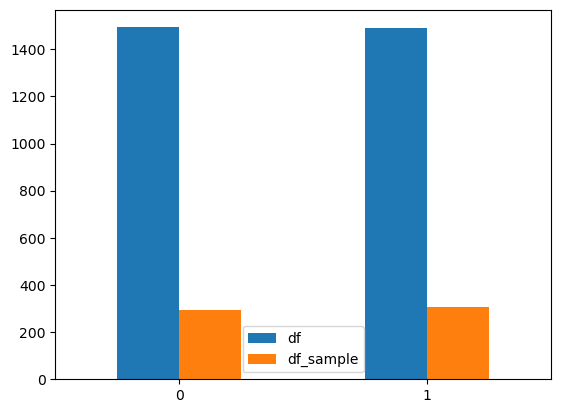

In [20]:
df_sample_count = df_sample.score.value_counts()
df_count = df.score.value_counts()
index = df_count.index
df_sample_count = df_sample_count[index]

plt_blar = pd.DataFrame({"df": df_count.values,
                         "df_sample": df_sample_count.values}, index=index)

ax = plt_blar.plot.bar(rot=0)

### 5.2 Feature Creation

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

# takes a like a minute or two to process
df['unigrams'] = df['setence'].apply(lambda x: tokenize_text(x))

In [23]:
df[0:5]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
4                             [The, mic, is, great, .]
Name: unigrams, dtype: object

In [24]:
df[0:5]

,setence,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"


### 5.3 Feature subset selection

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.setence) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


Now let us look at the term-document matrix we built above.

In [26]:
df_counts.shape

(2983, 5155)

In [27]:
count_vect.get_feature_names_out()[542:550]

array(['bop', 'bordered', 'borderlines', 'borders', 'bore', 'bored',
       'boring', 'borrowed'], dtype=object)

#### useful visualization

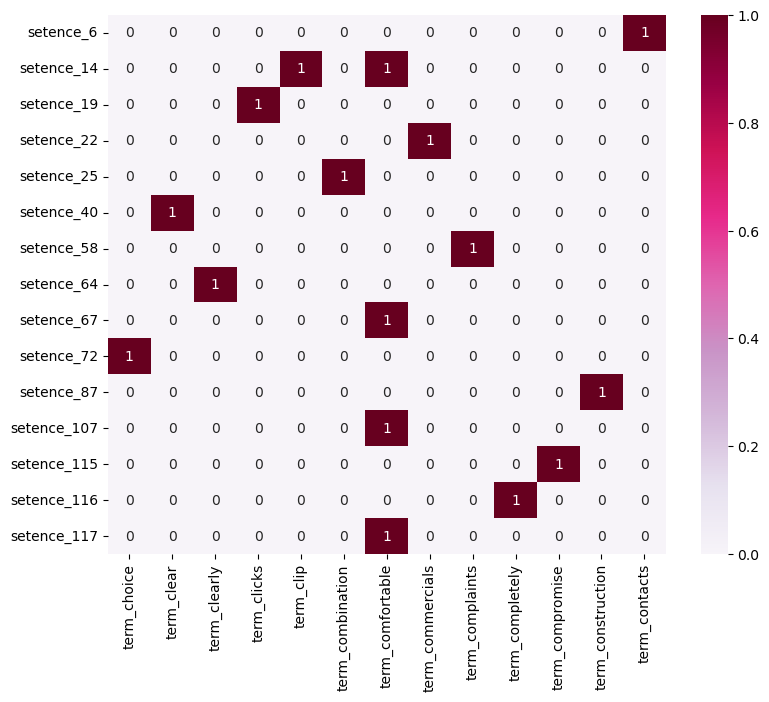

In [28]:
import seaborn as sns
"""
I select 120 setence and 200 terms to show.
However, lots of columns and rows are meaningless because they are all 0.
So, I think a method that only remains useful row and columns (nonzero column/row) and plot these remaining row and colums. 
"""

# first 800 to 1000 features only
plot_x1 = ["term_"+str(i) for i in count_vect.get_feature_names_out()[800:1000]]
plot_x1 = np.array(plot_x1)
# obtain document index
plot_y1 = ["setence_"+ str(i) for i in list(df.index)[0:120]]
plot_y1 = np.array(plot_y1)

#plot_v
plot_v = df_counts[0:120, 800:1000].toarray()


# find which column(terms) is meaningless and eliminate it
sum_col = plot_v.sum(axis=0)
column_remain_index = sum_col!=0
tmp_v = plot_v.T[column_remain_index,:].T

# find which row(doc_article) is meaningless and eliminate it
sum_row = tmp_v.sum(axis=1)
row_remain_index = sum_row!=0
result_v = tmp_v[row_remain_index]

# remains useful terms
plot_x10 = plot_x1[column_remain_index]
#remains useful doc_article
plot_y10 = plot_y1[row_remain_index]

#plot
df_todraw = pd.DataFrame(result_v, columns = plot_x10, index = plot_y10)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### 5.4 Dimensionality Reduction

In [29]:
from sklearn.decomposition import PCA

In [30]:
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

In [31]:
df_reduced.shape

(2983, 2)

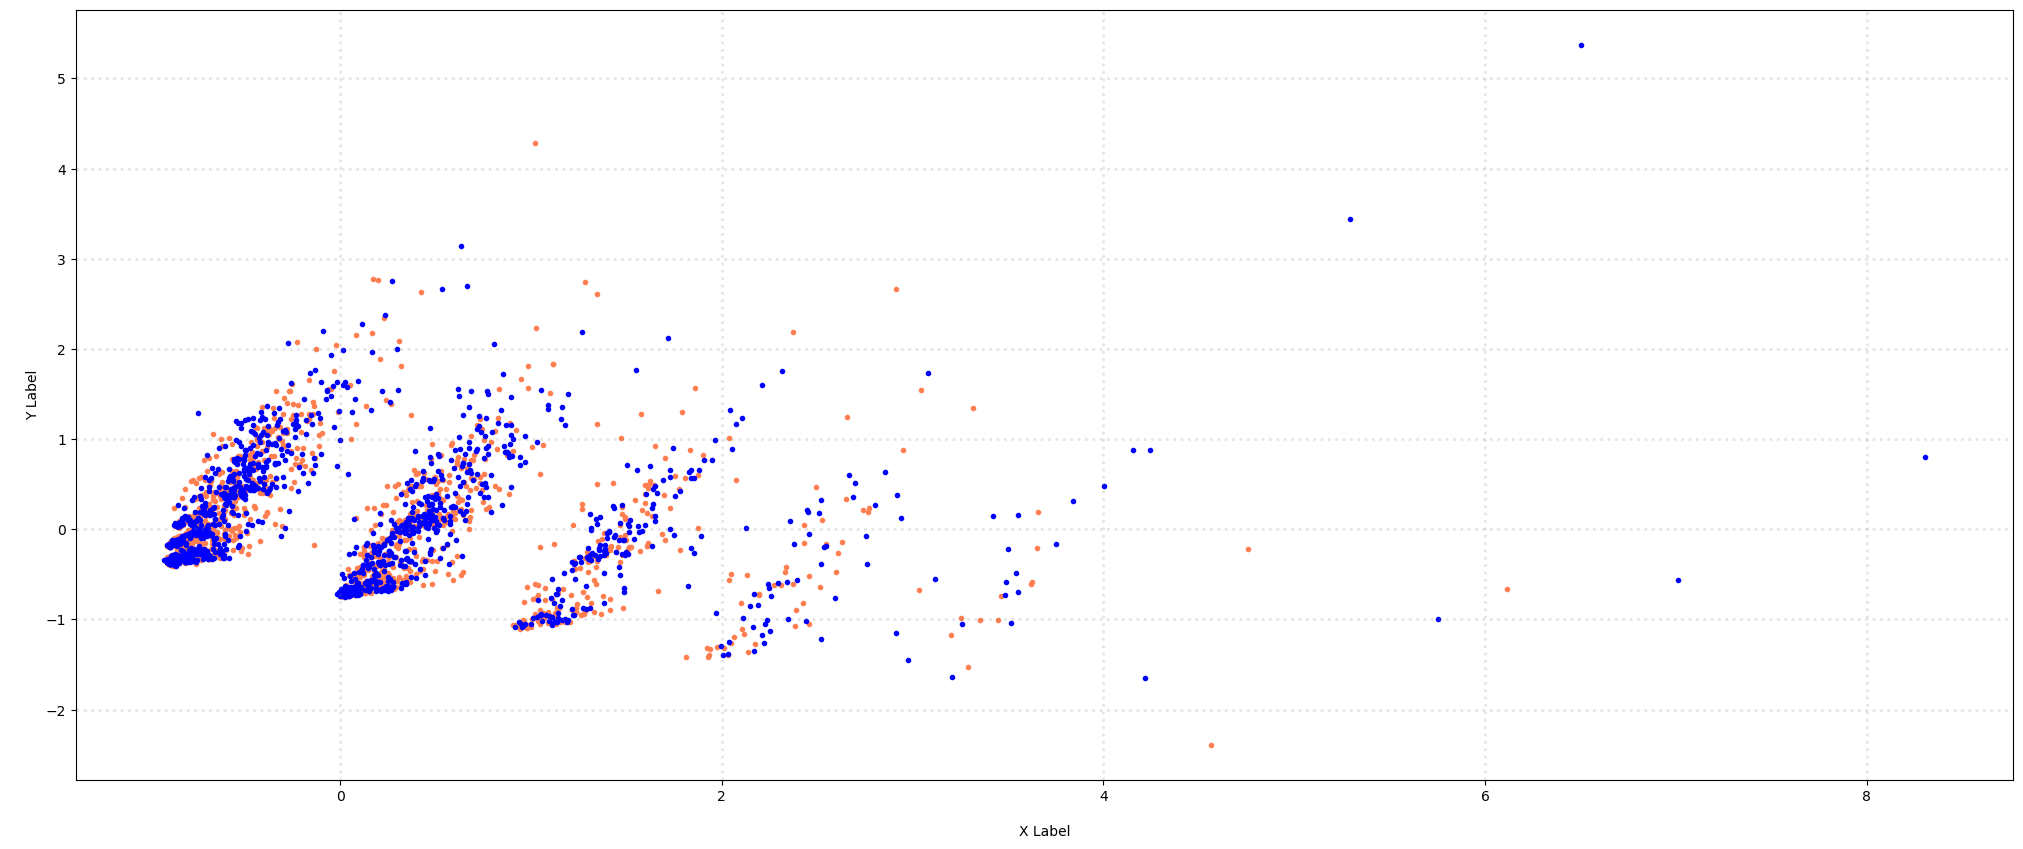

In [32]:
scores = [0 , 1]
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, scr in zip(col, scores):
    xs = df_reduced[df['score'] == scr].T[0]
    ys = df_reduced[df['score'] == scr].T[1]
   
    ax.scatter(xs, ys, c = c, marker='.')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### 5.5 Attribute Transformation / Aggregation

In [33]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [34]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [35]:
term_frequencies[0] #sum of first term

1

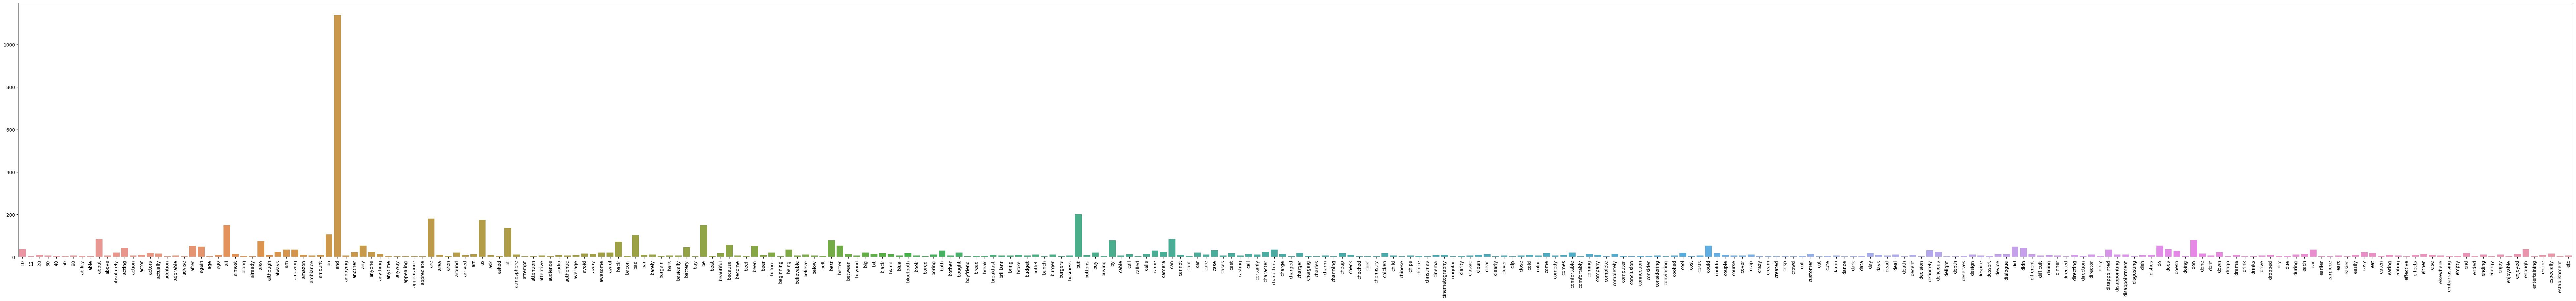

In [36]:
"""
To my opion, it is not important that those terms which are the bottom 75%.
Thus, eliminating those terms.  #number of terms from 5155 to 1074.
(plot only first 300 terms)
"""
b = int(np.percentile(term_frequencies, (75), interpolation='midpoint'))

remain_index1 = term_frequencies > b
term_frequencies1 = term_frequencies[remain_index1]

terms = count_vect.get_feature_names_out()[remain_index1]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=terms[:300], 
            y=term_frequencies1[:300])
g.set_xticklabels(terms[:300], rotation = 90);

#### the most used terms is 

In [37]:
idx = np.argmax(term_frequencies1)
count_vect.get_feature_names_out()[idx]

'commentary'

### 5.6 Discretization and Binarization

In [38]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

#### Try to generate the binarization using the score column instead.
The type of score is 'int', but my experience tells me that it is better to change the type of label(score) from integer to binarization in ML or DL. 

In [39]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.score)
df['bin_score'] = mlb.transform(df['score']).tolist()
df[0:9]

,setence,score,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


## 6. Data Exploration

In [40]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['setence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['setence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['setence']
document_to_transform_3.append(random_record_3)

In [41]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [42]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [43]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


## Third: please attempt the following tasks on the new dataset.

### 1. Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.


I want to use wordcloud to visualize when score is positive or negative which word (terms) is most used in setences.
If this word is most positive this word may be bigger than orthers.

In [44]:
# ! pip install wordcloud

In [59]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [65]:
## divide positive and negative unigrams
df_positive_unigrams = df[df.score==1].unigrams
df_negative_unigrams = df[df.score==0].unigrams

In [74]:
df_positive_unigrams_count = pd.DataFrame(list(df_positive_unigrams)).stack().value_counts().to_dict()
df_negative_unigrams_count = pd.DataFrame(list(df_negative_unigrams)).stack().value_counts().to_dict()

In [75]:
wordcloud_positive = WordCloud(background_color="white", contour_width=3, 
                      contour_color='steelblue').generate_from_frequencies(df_positive_unigrams_count)
wordcloud_negative = WordCloud(background_color="white", contour_width=3, 
                      contour_color='steelblue').generate_from_frequencies(df_negative_unigrams_count)

#### Which word is most used when the setences is positive.

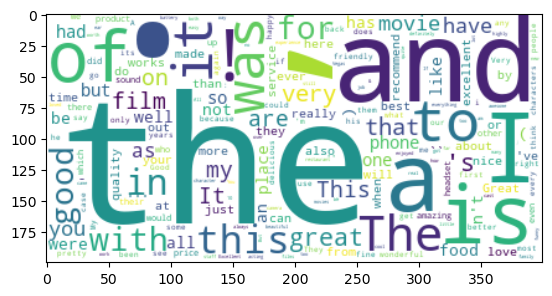

In [76]:
plt.figure()
plt.imshow(wordcloud_positive, interpolation="bilinear")

#### Which word is most used when the setences is negative.

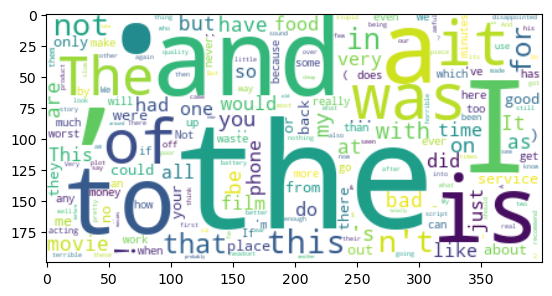

In [77]:
plt.figure()
plt.imshow(wordcloud_negative, interpolation="bilinear")

### 2. Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .

In [170]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
import math

#### TF-IDF value of each word per document

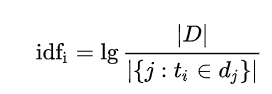

In [187]:
def computeIDF(terms_count):
    numDoc_perTerm = np.sum(terms_count!=0,axis=0).reshape((1,terms_count.shape[1]))
    IDFarr = np.log10(terms_count.shape[0] / numDoc_perTerm)
    return(IDFarr)

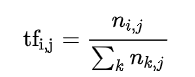

In [157]:
def computeTF(terms_count):
    numTerms_perDoc = np.sum(terms_count,axis=1).reshape((terms_count.shape[0],1))
    TFarr = terms_count / numTerms_perDoc
    return(TFarr)

In [188]:
def computeTF_IDF(terms_count):
    TF = computeTF(terms_count)
    IDF = computeIDF(terms_count)
    TF_TDFarr = TFarr * IDFarr
    return TF_TDFarr

there is 5155 terms .

In [175]:
terms = count_vect.get_feature_names_out()
len(terms)

5155

#### compute TF-IDF 

In [200]:
# change df_counts to array
terms_count = df_counts.toarray()
TF_IDFarr = computeTF_IDF(terms_count)

In [201]:
TF_IDFarr.shape

(2983, 5155)

In [202]:
# check whethere the number of terms counts is the same
np.sum(terms_count!=0) == np.sum(TFarr!= 0.) == np.sum(TF_IDFarr!= 0.)

True

In [203]:
# check how many number of TF_TDFarr is nonzero
np.sum(TF_IDFarr != 0.)

31515

In [204]:
TF_IDFdf = pd.DataFrame(TF_IDFarr, columns=terms)
TF_IDFdf

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.

In [198]:
from sklearn.naive_bayes import GaussianNB

change the type of data from pd.dataframe to numpy array

In [215]:
TF_IDFarr = TF_IDFdf.to_numpy()   # TF-IDF features
X_frequency_arr = df_counts.toarray() # word frequency features

In [210]:
print(TF_IDFarr.shape)
print(X_frequency_arr.shape)

(2983, 5155)
(2983, 5155)


#### split data:   
            
              number of training data is 2583

              number of testing data is 400

In [245]:
doc = TF_IDFarr.shape[0]
idx = np.arange(doc)
np.random.shuffle(idx)
idx_test = idx[:400]
idx_train = idx[400:]
TF_IDF_train = TF_IDFarr[idx_train]
TF_IDF_test = TF_IDFarr[idx_test]
X_frequency_test = X_frequency_arr[idx_test]
X_frequency_train = X_frequency_arr[idx_train]
score = df.score.to_numpy()
score_test = score[idx_test]
score_train = score[idx_train]

In [244]:
score_test.shape

(400,)

In [236]:
X_frequency_train.shape

(2583, 5155)

In [237]:
X_frequency_test.shape

(400, 5155)

#### build and fit Bayes classifier with TF_TDFarr as inputX

In [247]:
model_TF_IDF = GaussianNB()
model_TF_IDF.fit(TF_IDF_train, score_train)

GaussianNB()

#### build and fit Bayes classifier with word frequency features as inputX

In [248]:
model_frequency = GaussianNB()
model_frequency.fit(X_frequency_train, score_train)

GaussianNB()

#### predict test data

In [249]:
predict_TFIDF = model_TF_IDF.predict(TF_IDF_test)
predict_frequency = model_frequency.predict(X_frequency_test)

#### accuracy

In [251]:
def computeAcc(predict, target):
    return np.sum(predict==target)/target.shape[0]

In [254]:
print("TFIDF test acc: ", computeAcc(predict_TFIDF, score_test)*100, "%")
print("frequency test acc: ", computeAcc(predict_frequency, score_test)*100, "%")

TFIDF test acc:  66.75 %
frequency test acc:  67.75 %


## Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

### I think in the lab1-master

#### there is a cell in 5.5 Attribute Transformation / Aggregation

In [ ]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))


#### can be changed with

In [ ]:
np.sum(X_counts,axis=0)